In [101]:
import glob
import tqdm
import SimpleITK as sitk
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
from collections import Counter
from scipy.ndimage import label, binary_fill_holes
import os
import shutil
from skimage import io, color

In [151]:
# ATLAS
conds = next(os.walk('./Dataset_Brain_lesion/'))[1]

In [152]:
conds

['Philips',
 'Siemens Prisma',
 'Siemens Magnetom Skyra',
 'GE 750 Discovery',
 'Siemens Verio',
 'Siemens Trio',
 'Siemens Sonata',
 'GE Signa HD-X',
 'Siemens Allegra',
 'Siemens Skyra',
 'Siemens Vision',
 'Philips Achieva',
 'GE Signa Excite',
 'Siemens TrioTim']

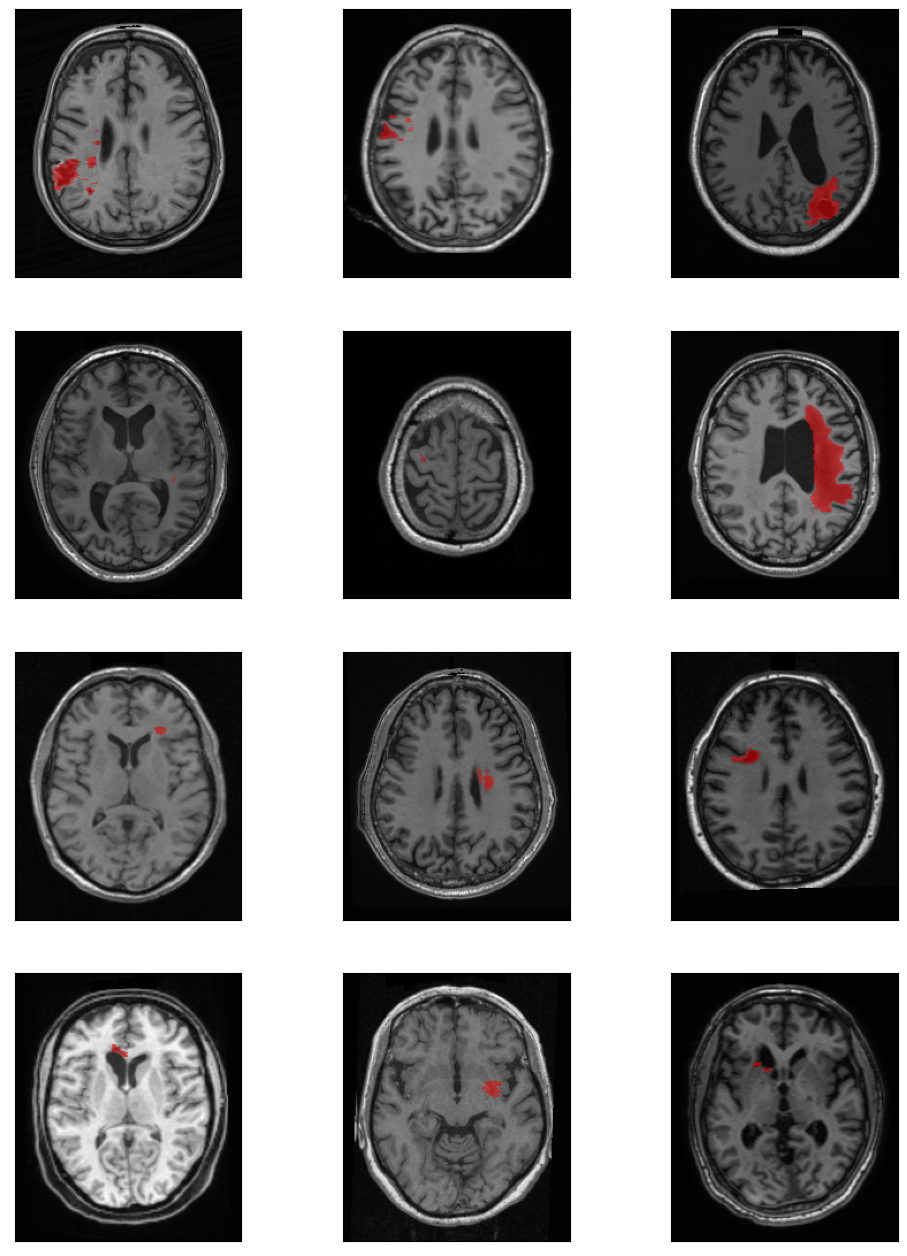

In [156]:
slices = [100, 100, 100, 82, 140, 100, 80, 100, 100, 80, 60, 70]
cases = [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
plt.figure(figsize=(12, 16))
for i in range(12):
    Img_cond1 = glob.glob('./Dataset_Brain_lesion/' + conds[i % len(conds)] + '/*/image.nii.gz')
    Lbl_cond1 = glob.glob('./Dataset_Brain_lesion/' + conds[i % len(conds)] + '/*/seg.nii.gz')
    
    # Read images and labels
    img_obj = sitk.ReadImage(Img_cond1[cases[i]])
    array_img = sitk.GetArrayFromImage(img_obj)
    
    lbl_obj = sitk.ReadImage(Lbl_cond1[cases[i]])
    array_lbl = sitk.GetArrayFromImage(lbl_obj)
    
    img = array_img[slices[i], ::-1, :]
    label2 = array_lbl[slices[i], ::-1, :] != 0
    
    # Plot
    plt.subplot(4, 3, i + 1)
    plt.imshow(img, cmap='gray')
    masked = np.ma.masked_where(np.uint8(label2) == 0, np.ones(label2.shape))
    plt.imshow(masked, 'autumn', interpolation='none', alpha=0.5)
    plt.xticks([])
    plt.yticks([])

plt.show()

In [132]:
# Prostate
conds = next(os.walk('./Dataset_Prostate/'))[1]

In [133]:
conds

['HK', 'UCL', 'BMC', 'I2CVB', 'BIDMC', 'RUNMC']

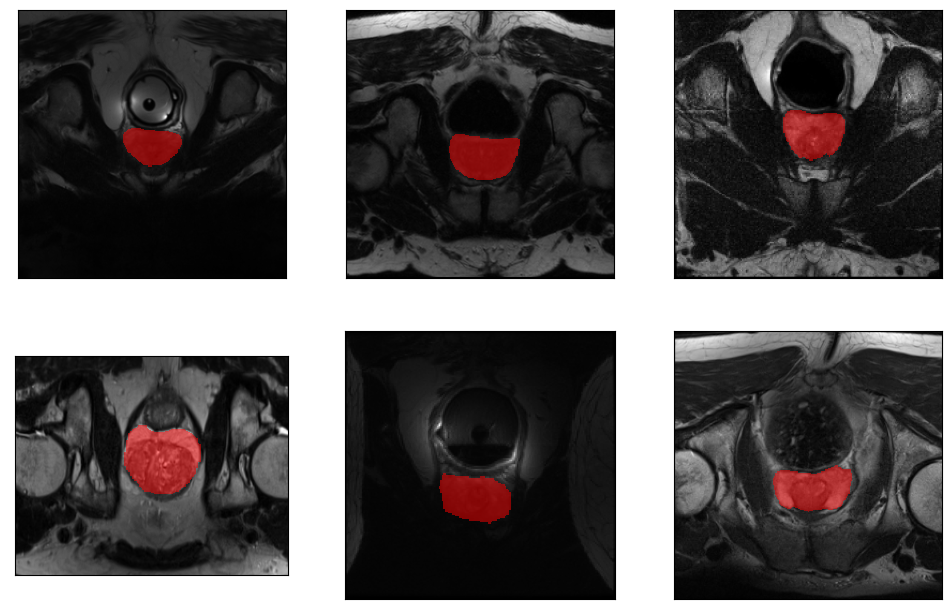

In [135]:
slices = [20, 20, 20, 20, 20, 20]
plt.figure(figsize=(12, 16))
for i in range(6):
    Img_cond1 = glob.glob('./Dataset_Prostate/' + conds[i % len(conds)] + '/*/image.nii.gz')
    Lbl_cond1 = glob.glob('./Dataset_Prostate/' + conds[i % len(conds)] + '/*/seg.nii.gz')
    
    # Read images and labels
    img_obj = sitk.ReadImage(Img_cond1[0])
    array_img = sitk.GetArrayFromImage(img_obj)
    
    lbl_obj = sitk.ReadImage(Lbl_cond1[0])
    array_lbl = sitk.GetArrayFromImage(lbl_obj)
    
    img = array_img[slices[i], ::-1, :]
    label2 = array_lbl[slices[i], ::-1, :] != 0
    
    # Plot
    plt.subplot(4, 3, i + 1)
    plt.imshow(img, cmap='gray')
    masked = np.ma.masked_where(np.uint8(label2) == 0, np.ones(label2.shape))
    plt.imshow(masked, 'autumn', interpolation='none', alpha=0.5)
    plt.xticks([])
    plt.yticks([])

plt.show()

In [137]:
# Prostate
conds = next(os.walk('./Dataset_Cardiac/'))[1]

In [138]:
conds

['3', '5', '2', '4', '1']

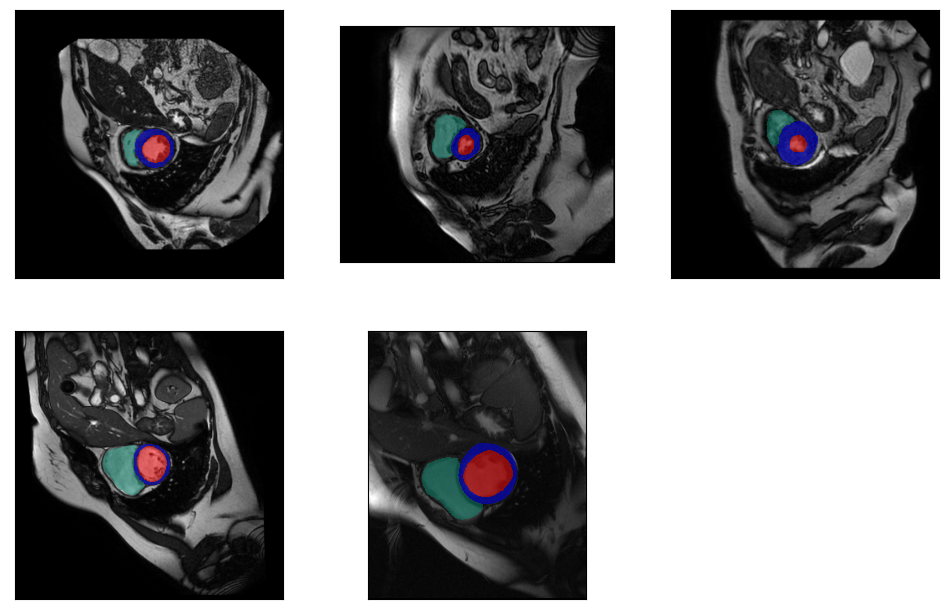

In [148]:
slices = [5, 5, 5, 5, 5]
plt.figure(figsize=(12, 16))
for i in range(5):
    Img_cond1 = glob.glob('./Dataset_Cardiac/' + conds[i % len(conds)] + '/*/image.nii.gz')
    Lbl_cond1 = glob.glob('./Dataset_Cardiac/' + conds[i % len(conds)] + '/*/seg.nii.gz')
    
    # Read images and labels
    img_obj = sitk.ReadImage(Img_cond1[0])
    array_img = sitk.GetArrayFromImage(img_obj)
    
    lbl_obj = sitk.ReadImage(Lbl_cond1[0])
    array_lbl = sitk.GetArrayFromImage(lbl_obj)
    
    img = array_img[slices[i], ::-1, :]
    label2 = array_lbl[slices[i], ::-1, :]
    
    # Plot
    plt.subplot(4, 3, i + 1)
    plt.imshow(img, cmap='gray')
    masked = np.ma.masked_where(np.uint8(label2) != 1, np.ones(label2.shape))
    plt.imshow(masked, 'autumn', interpolation='none', alpha=0.5)
    masked = np.ma.masked_where(np.uint8(label2) != 2, np.ones(label2.shape))
    plt.imshow(masked, 'winter', interpolation='none', alpha=0.5)
    masked = np.ma.masked_where(np.uint8(label2) != 3, np.ones(label2.shape))
    plt.imshow(masked, 'summer', interpolation='none', alpha=0.5)
    plt.xticks([])
    plt.yticks([])

plt.show()